# Crypto Analysis

Eric Hedgren, Gavin Fisher, and Blake Nelson

In [14]:
import requests
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

def get_crypto_data(crypto_id='bitcoin', days=30):
    url = f'https://api.coingecko.com/api/v3/coins/{crypto_id}/market_chart'
    params = {'vs_currency': 'usd', 'days': str(days), 'interval': 'daily'}
    response = requests.get(url, params=params)
    data = response.json()

    prices = data['prices']
    df = pd.DataFrame(prices, columns=['timestamp', 'price'])
    df['timestamp'] = pd.to_datetime(df['timestamp'], unit='ms')
    
    return df

def prepare_data(df):
    df['price_next'] = df['price'].shift(-1)
    df = df.dropna()

    X = df[['price']]
    y = df['price_next']
    
    return X, y

def train_model(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    
    return model, rmse, y_pred, y_test

def predict_tomorrow(model, df):
    last_price = df['price'].iloc[-1]
    predicted_price = model.predict([[last_price]])[0]
    
    return predicted_price

def plot_data(df):
    plt.plot(df['timestamp'], df['price'], label='Price')
    plt.xlabel('Date')
    plt.ylabel('Price (USD)')
    plt.title('Cryptocurrency Price Over Time')
    plt.legend()
    plt.show()


Model RMSE (Root Mean Squared Error): 1954.70
Predicted Price for Tomorrow: $95558.09


/home/eric/git-repos/ObjectDetection-DS3010/venv/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


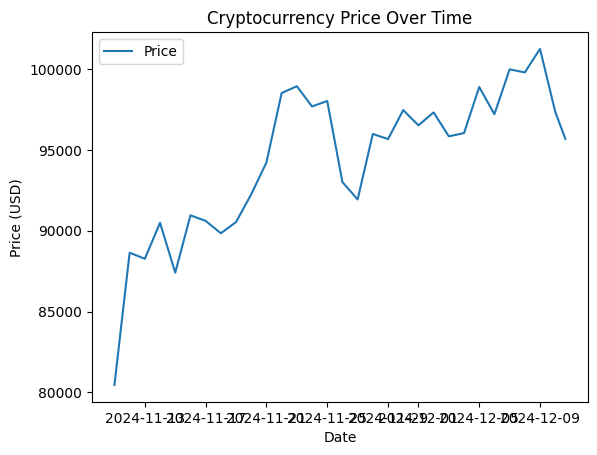

In [15]:
df = get_crypto_data('bitcoin', days=30)

X, y = prepare_data(df)

model, rmse, y_pred, y_test = train_model(X, y)
print(f'Model RMSE (Root Mean Squared Error): {rmse:.2f}')

tomorrow_price = predict_tomorrow(model, df)
print(f'Predicted Price for Tomorrow: ${tomorrow_price:.2f}')

plot_data(df)